# Multiple Factor Analysis (MFA)

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")
display(wine)

,Label,Soil,Odor.Intensity.before.shaking,Aroma.quality.before.shaking,Fruity.before.shaking,Flower.before.shaking,Spice.before.shaking,Visual.intensity,Nuance,Surface.feeling,...,Acidity,Astringency,Alcohol,Balance,Smooth,Bitterness,Intensity,Harmony,Overall.quality,Typical
2EL,Saumur,Env1,3.074,3.000,2.714,2.280,1.960,4.321,4.000,3.269,...,2.107,2.429,2.500,3.250,2.731,1.926,2.857,3.143,3.393,3.250
1CHA,Saumur,Env1,2.964,2.821,2.375,2.280,1.680,3.222,3.000,2.808,...,2.107,2.179,2.654,2.926,2.500,1.926,2.893,2.964,3.214,3.036
1FON,Bourgueuil,Env1,2.857,2.929,2.560,1.960,2.077,3.536,3.393,3.000,...,2.179,2.250,2.643,3.321,2.679,2.000,3.074,3.143,3.536,3.179
1VAU,Chinon,Env2,2.808,2.593,2.417,1.913,2.160,2.893,2.786,2.538,...,3.179,2.185,2.500,2.333,1.680,1.963,2.462,2.038,2.464,2.250
1DAM,Saumur,Reference,3.607,3.429,3.154,2.154,2.040,4.393,4.036,3.385,...,2.571,2.536,2.786,3.464,3.036,2.071,3.643,3.643,3.741,3.444
2BOU,Bourgueuil,Reference,2.857,3.111,2.577,2.040,2.077,4.464,4.259,3.407,...,2.393,2.643,2.857,3.286,2.857,2.179,3.464,3.500,3.643,3.393
1BOI,Bourgueuil,Reference,3.214,3.222,2.962,2.115,2.040,4.143,3.929,3.250,...,2.607,2.607,2.778,3.464,2.857,1.929,3.643,3.556,3.714,3.357
3EL,Saumur,Env1,3.120,2.852,2.500,2.200,2.185,4.214,3.857,3.077,...,2.179,2.630,2.778,3.179,2.786,2.000,3.321,3.296,3.393,3.071
DOM1,Chinon,Env1,2.857,2.815,2.808,1.923,2.074,4.037,3.893,3.280,...,2.286,2.407,2.741,3.143,2.821,1.964,3.148,3.286,3.200,3.500
1TUR,Saumur,Env2,2.893,3.000,2.571,1.846,1.680,3.704,3.407,3.111,...,2.357,2.250,2.704,3.214,2.500,2.185,2.857,2.963,3.179,2.964


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Label                          21 non-null     object 
 1   Soil                           21 non-null     object 
 2   Odor.Intensity.before.shaking  21 non-null     float64
 3   Aroma.quality.before.shaking   21 non-null     float64
 4   Fruity.before.shaking          21 non-null     float64
 5   Flower.before.shaking          21 non-null     float64
 6   Spice.before.shaking           21 non-null     float64
 7   Visual.intensity               21 non-null     float64
 8   Nuance                         21 non-null     float64
 9   Surface.feeling                21 non-null     float64
 10  Odor.Intensity                 21 non-null     float64
 11  Quality.of.odour               21 non-null     float64
 12  Fruity                         21 non-null     float

Pour réaliser un analyse factorielle multiple avec scientisttools, nous devons effectuer un traitement de notre jeu de données

### MFA

In [3]:
wine2 = pd.DataFrame(data=wine.values,
                     columns = pd.MultiIndex.from_tuples(
    [
        ("origin","Label"),
        ("origin","Soil"),
        ("odor","Odor.Intensity.before.shaking"),
        ("odor","Aroma.quality.before.shaking"),
        ("odor","Fruity.before.shaking"),
        ("odor","Flower.before.shaking"),
        ("odor","Spice.before.shaking"),
        ("visual","Visual.intensity"),
        ("visual","Nuance"),
        ("visual","Surface.feeling"),
        ("odor.after.shaking","Odor.intensity"),
        ("odor.after.shaking","Quality.of.odour"),
        ("odor.after.shaking","Fruity"),
        ("odor.after.shaking","Flower"),
        ("odor.after.shaking","Spice"),
        ("odor.after.shaking","Plante"),
        ("odor.after.shaking","Phenolic"),
        ("odor.after.shaking","Aroma.intensity"),
        ("odor.after.shaking","Aroma.persistency"),
        ("odor.after.shaking","Aroma.quality"),
        ("taste","Attack.intensity"),
        ("taste","Acidity"),
        ("taste","Astringency"),
        ("taste","Alcohol"),
        ("taste","Balance"),
        ("taste","Smooth"),
        ("taste","Bitterness"),
        ("taste","Intensity"),
        ("taste","Harmony"),
        ("overall","Overall.quality"),
        ("overall","Typical")
    ]
))
wine2.index= wine.index

In [4]:
group = wine2.columns.levels[0].drop(["origin","overall"]).tolist()
group

['odor', 'odor.after.shaking', 'taste', 'visual']

In [5]:
group_sup = wine2.columns.levels[0].drop(group).tolist()
group_sup

['origin', 'overall']

In [6]:
for g in group:
    wine2[g] = wine2[g].astype("float")
wine2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   (origin, Label)                          21 non-null     object 
 1   (origin, Soil)                           21 non-null     object 
 2   (odor, Odor.Intensity.before.shaking)    21 non-null     float64
 3   (odor, Aroma.quality.before.shaking)     21 non-null     float64
 4   (odor, Fruity.before.shaking)            21 non-null     float64
 5   (odor, Flower.before.shaking)            21 non-null     float64
 6   (odor, Spice.before.shaking)             21 non-null     float64
 7   (visual, Visual.intensity)               21 non-null     float64
 8   (visual, Nuance)                         21 non-null     float64
 9   (visual, Surface.feeling)                21 non-null     float64
 10  (odor.after.shaking, Odor.intensity)     21 non-null

In [7]:
# Set
wine2["overall"] = wine2["overall"].astype("float")

In [8]:
from scientisttools.decomposition import MFA

mfa = MFA(n_components=5,
          group=group,
          group_sup=group_sup,
          row_labels=wine2.index,
          parallelize=True)
# Instanciation
mfa.fit(wine2)

MFA(group=['odor', 'odor.after.shaking', 'taste', 'visual'],
    group_sup=['origin', 'overall'], n_components=5, parallelize=True,
    row_labels=Index(['2EL ', '1CHA', '1FON', '1VAU', '1DAM', '2BOU', '1BOI', '3EL ', 'DOM1',
       '1TUR', '4EL ', 'PER1', '2DAM', '1POY', '1ING', '1BEN', '2BEA', '1ROC',
       '2ING', 'T1  ', 'T2  '],
      dtype='object'))

In [9]:
mfa.group

['odor', 'odor.after.shaking', 'taste', 'visual']

In [10]:
# Valeurs propres
from scientisttools.extractfactor import get_eig
eig = get_eig(mfa)
display(eig)

,eigenvalue,difference,proportion,cumulative
Dim.1,3.461950,2.095182,49.378382,49.378382
Dim.2,1.366768,0.751339,19.494446,68.872829
Dim.3,0.615429,0.243229,8.777969,77.650797
Dim.4,0.372200,0.101817,5.308747,82.959544
Dim.5,0.270382,0.067979,3.856511,86.816055


In [11]:
from scientisttools.extractfactor import get_mfa_ind
row = get_mfa_ind(mfa)
row.keys()

dict_keys(['coord', 'contrib', 'cos2', 'coord_partiel', 'within_inertia', 'within_partial_inertia'])

In [12]:
mfa.group_sup_coord_

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
origin,0.295867,0.642682,0.196316,0.140429,0.292252
overall,0.618876,0.254323,0.009923,0.040821,0.014408


#### Row coordinates

In [13]:
# Row coordinates
row["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
2EL,0.238874,0.796677,-0.935737,0.524407,-0.351492
1CHA,-2.044793,1.383315,-1.513530,0.729589,0.071290
1FON,-1.220141,0.459020,-0.062333,-1.036356,0.717976
1VAU,-4.381299,-0.994551,0.033460,0.310046,0.477621
1DAM,2.695771,0.120330,0.689965,0.830386,0.816247
2BOU,0.868637,0.326270,-0.391083,-1.274204,0.070273


In [14]:
# Row contributions
row["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
2EL,0.078487,2.211316,6.775010,3.518366,2.175870
1CHA,5.751202,6.666957,17.724946,6.810224,0.089507
1FON,2.047764,0.734090,0.030064,13.741141,9.078656
1VAU,26.403755,3.446198,0.008663,1.229865,4.017628
1DAM,9.995994,0.050446,3.683467,8.821961,11.733993
2BOU,1.037856,0.370886,1.183427,20.772205,0.086973


In [15]:
# Row cos2
row["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
2EL,0.016319,0.181524,0.250424,0.078651,0.035335
1CHA,0.418802,0.191669,0.229452,0.053317,0.000509
1FON,0.367423,0.052001,0.000959,0.265072,0.127223
1VAU,0.873760,0.045024,0.000051,0.004376,0.010384
1DAM,0.754361,0.001503,0.049416,0.071577,0.069160
2BOU,0.218894,0.030882,0.044371,0.471016,0.001433


In [16]:
# Partial coordinates
row["coord_partiel"].head()

odor                                         odor.after.shaking  \
         Dim.1     Dim.2     Dim.3     Dim.4     Dim.5              Dim.1   
2EL   0.407263  1.279499 -2.458383  1.725928  0.431212           0.357349   
1CHA -1.757936  2.756439 -4.961487  0.348599 -2.433673          -2.119630   
1FON -1.792750 -0.246577 -0.579271 -2.694108 -0.618510          -1.337619   
1VAU -3.860684 -1.108277 -2.445325 -4.674353 -1.107516          -4.734360   
1DAM  4.362643 -0.893450  3.308917  4.833331  2.687625           2.980065   

                                                 taste                      \
         Dim.2     Dim.3     Dim.4     Dim.5     Dim.1     Dim.2     Dim.3   
2EL   1.350813 -0.731069  1.118806 -0.474202 -0.847003  0.921994 -0.260639   
1CHA  1.248869 -1.933167  0.070484  1.610003 -1.466624  0.648569  0.194408   
1FON  0.757873  0.180294 -2.248843  2.818222 -0.318874  0.873791 -0.185176   
1VAU -2.291265 -0.785343 -0.624816 -0.696412 -4.697356 -1.812210  2.503975   
1DAM  1.467456  0.286561  0.607498  0.550167  1.960365  0.356832 -0.511548   

                            visual                                          
         Dim.4     Dim.5     Dim.1     Dim.2     Dim.3     Dim.4     Dim.5  
2EL   0.003733 -0.648805  1.037884 -0.365596 -0.292855 -0.750840 -0.714173  
1CHA  0.571160 -0.774916 -2.834983  0.879381  0.646124  1.928113  1.883744  
1FON -0.174855 -0.281047 -1.431321  0.450993  0.334820  0.972381  0.953238  
1VAU  3.774998  0.953447 -4.232797  1.233546  0.860531  2.764357  2.760967  
1DAM -1.139648  1.001605  1.480013 -0.449520 -0.324071 -0.979636 -0.974407

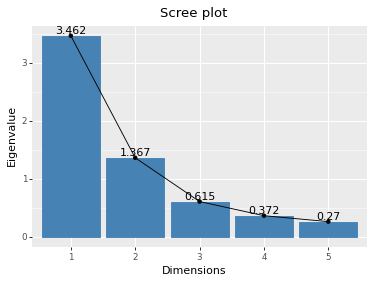

In [17]:
# Scree plot - eigenvalue
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(mfa,choice="eigenvalue",add_labels=True)
print(p)

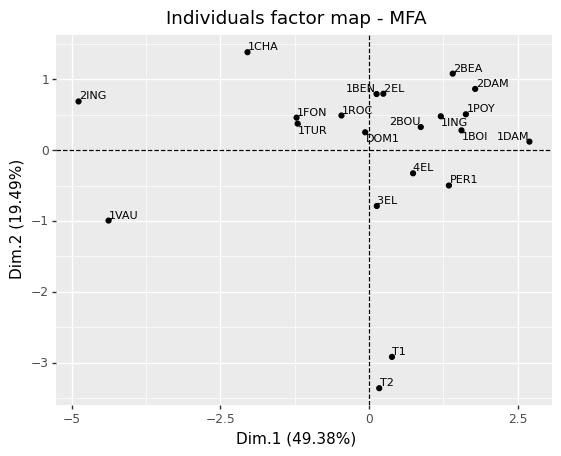

In [18]:
from scientisttools.ggplot import fviz_mfa_ind
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="black")
print(p)

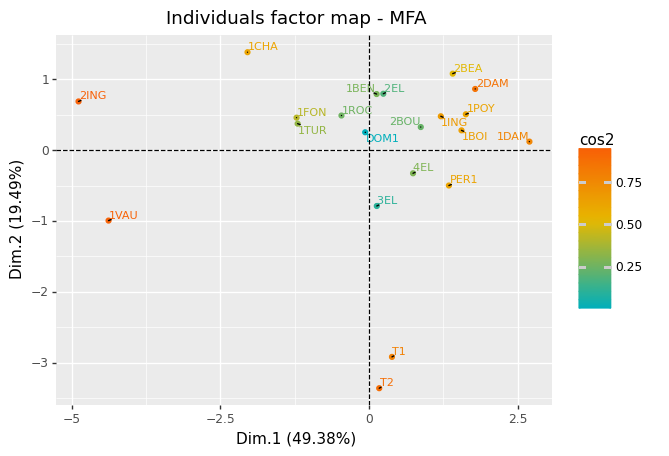

In [19]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="cos2",
                 gradient_cols=("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

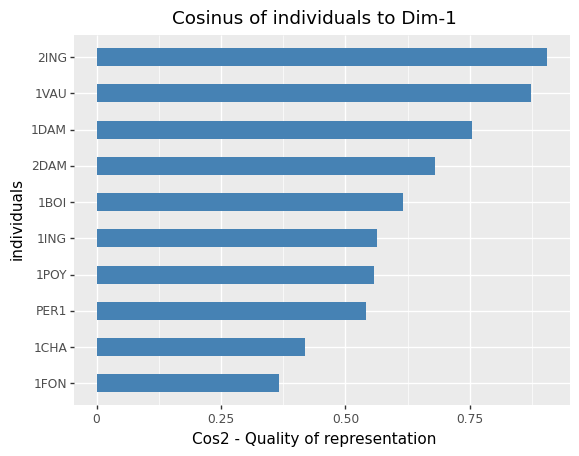

In [20]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(mfa,choice="ind",axis=0)
print(p)

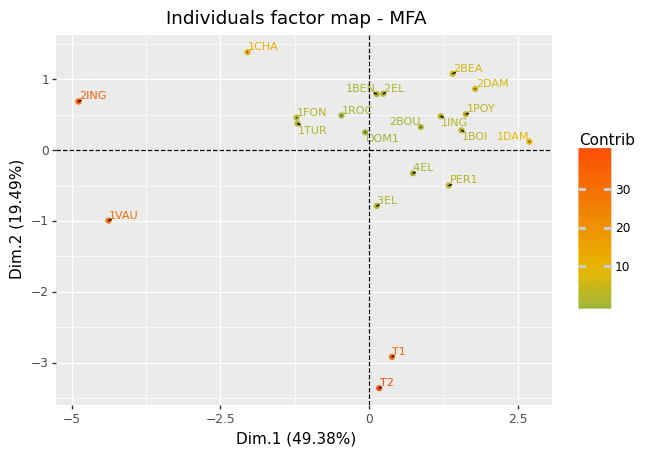

In [21]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="contrib",
                 gradient_cols=("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

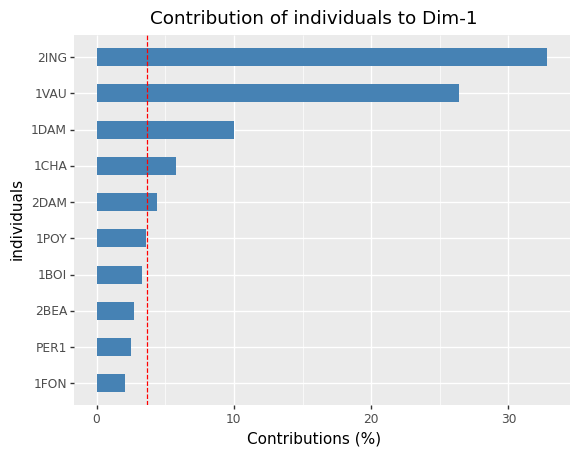

In [22]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(mfa,choice="ind",axis=0)
print(p)

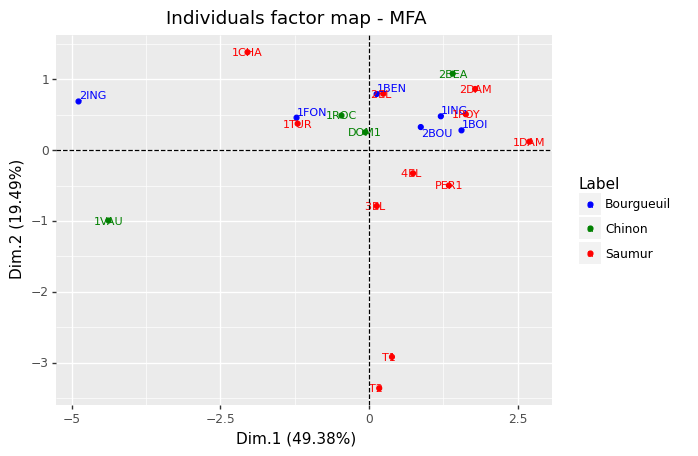

In [23]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 habillage="Label", # color by groups 
                 palette = ("blue", "green", "red"),
                 add_ellipse=False)
print(p)

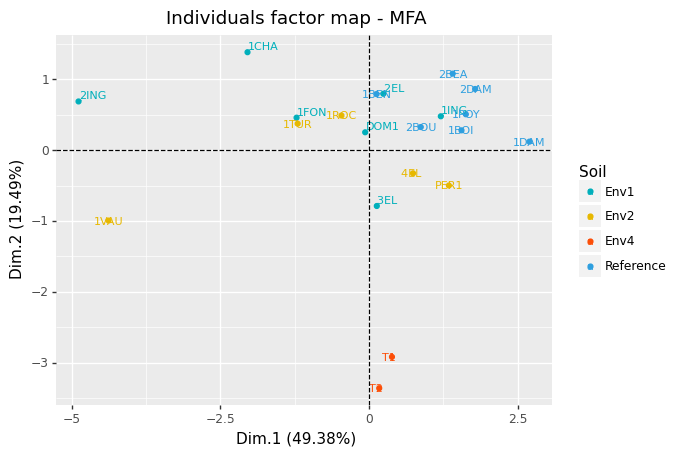

In [24]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 habillage="Soil", # color by groups 
                 palette = ("#00AFBB", "#E7B800", "#FC4E07","#2E9FDF"),
                 add_ellipse=False)
print(p)

In [25]:
from scientisttools.extractfactor import summaryMFA
summaryMFA(mfa,to_markdown=False)

                     Multiple Factor Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4   Dim.5
Variance                  3.462   1.367   0.615   0.372   0.270
Difference                2.095   0.751   0.243   0.102   0.068
% of var.                49.378  19.494   8.778   5.309   3.857
Cumulative of % of var.  49.378  68.873  77.651  82.960  86.816

Individuals (the 10 first)

      Dim.1  Dim.2  Dim.3
2EL   0.239  0.797 -0.936
1CHA -2.045  1.383 -1.514
1FON -1.220  0.459 -0.062
1VAU -4.381 -0.995  0.033
1DAM  2.696  0.120  0.690
2BOU  0.869  0.326 -0.391
1BOI  1.553  0.280  0.414
3EL   0.129 -0.789 -1.858
DOM1 -0.066  0.253  0.459
1TUR -1.202  0.375  0.716


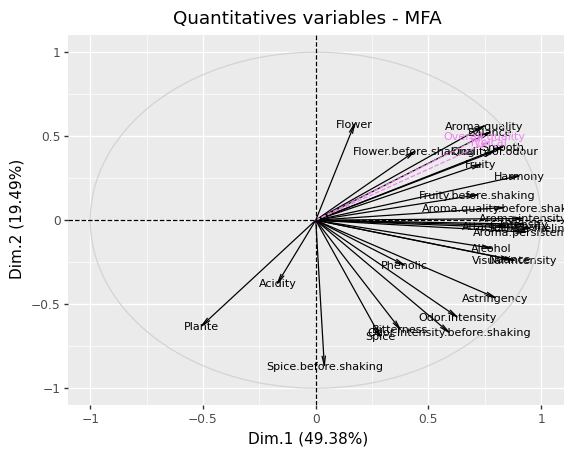

In [26]:
from scientisttools.ggplot import fviz_mfa_col
p = fviz_mfa_col(mfa,color="black",color_sup="violet")
print(p)

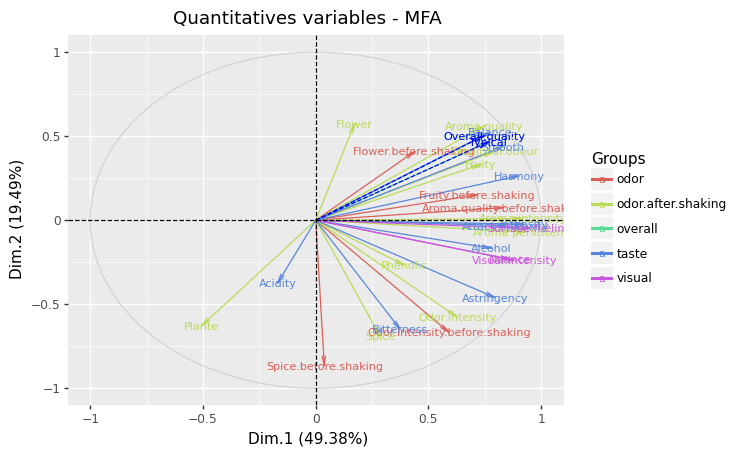

In [27]:
p = fviz_mfa_col(mfa,color="group",color_sup="blue")
print(p)

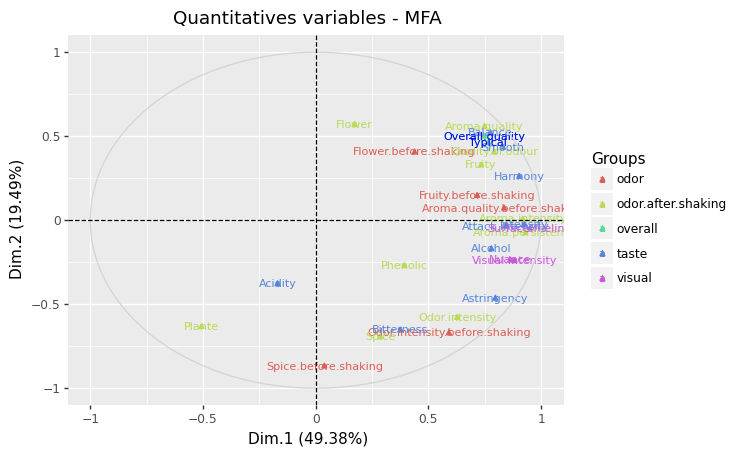

In [28]:
p = fviz_mfa_col(mfa,color="group",color_sup="blue",geom=["point","text"])
print(p)

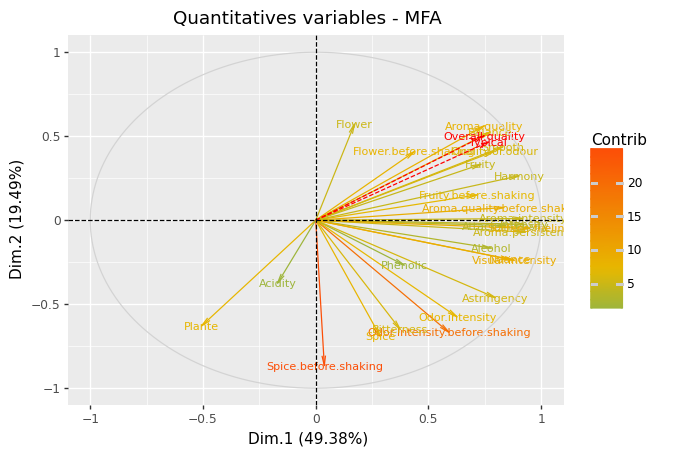

In [29]:
p = fviz_mfa_col(mfa,color="contrib",gradient_cols=("#00AFBB","#E7B800", "#FC4E07"))
print(p)

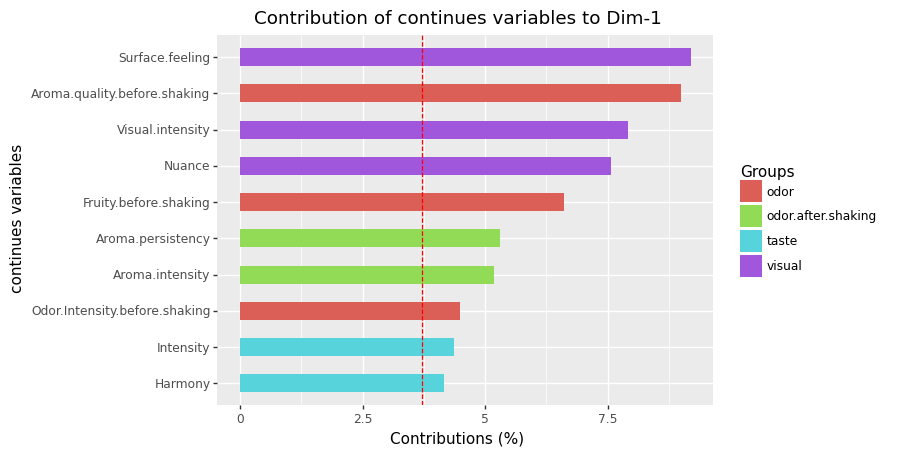

In [30]:
p = fviz_contrib(mfa,choice="var",axis=0,palette=None)
print(p)

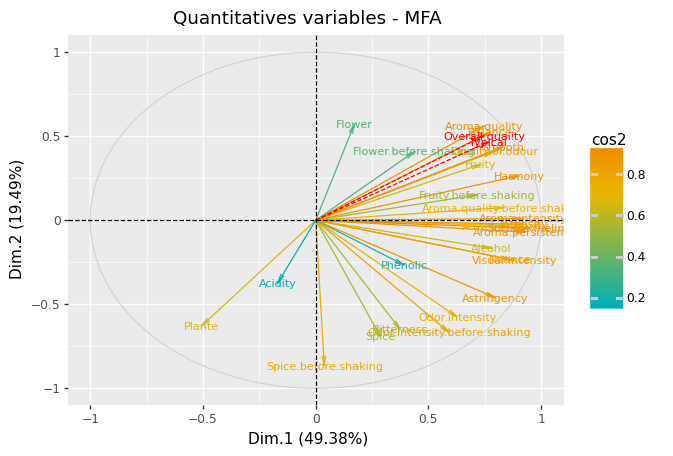

In [31]:
p = fviz_mfa_col(mfa,color="cos2",gradient_cols=("#00AFBB","#E7B800","#FC4E07"))
print(p)

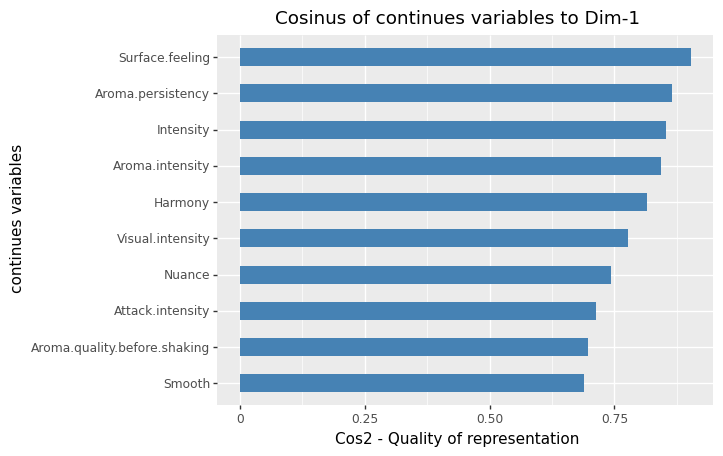

In [32]:
p = fviz_cosines(mfa,choice="var",axis=0)
print(p)

## Groups

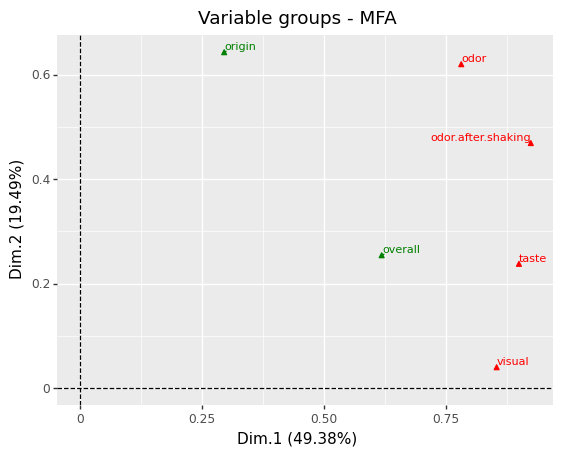

In [33]:
from scientisttools.ggplot import fviz_mfa_group
p = fviz_mfa_group(mfa,group_sup=True,repel=True,marker="^")
print(p)

In [34]:
mfa.mod_sup_coord_partiel_

odor                                          \
                     Dim.1     Dim.2     Dim.3     Dim.4     Dim.5   
Label_Bourgueuil -0.337584  0.492685  0.334296 -0.772113 -0.112961   
Label_Chinon     -1.005381  0.634595 -0.001330 -1.012890 -0.508733   
Label_Saumur      0.549730 -0.499499 -0.181860  0.789476  0.246609   
Soil_Env1        -1.084351  0.764340 -1.611905 -0.757095 -0.561523   
Soil_Env2        -0.851149 -0.110555  0.602793 -1.248709 -1.018361   
Soil_Env4         0.817586 -5.736394  0.547359 -0.363485  2.812768   
Soil_Reference    1.458719  0.953597  1.024951  1.752883  0.485276   

                 odor.after.shaking                                          \
                              Dim.1     Dim.2     Dim.3     Dim.4     Dim.5   
Label_Bourgueuil          -0.440269  0.982220  0.367228 -1.366386  1.407031   
Label_Chinon              -0.388861  0.144285  0.274310  0.008438 -0.304119   
Label_Saumur               0.381551 -0.588224 -0.300055  0.742233 -0.656883   
Soil_Env1                 -0.890298  0.317006 -0.455521 -0.435810  0.547653   
Soil_Env2                 -0.811419 -0.380402  0.240881  0.182394 -0.794859   
Soil_Env4                 -0.654820 -4.268150 -0.181465  1.421566 -2.019702   
Soil_Reference             1.656974  1.174182  0.335310 -0.100632  0.597161   

                     taste                                            visual  \
                     Dim.1     Dim.2     Dim.3     Dim.4     Dim.5     Dim.1   
Label_Bourgueuil -0.212076  0.349044  0.015517  0.048978 -0.032634 -0.578685   
Label_Chinon     -1.035893 -0.333669  0.704961  0.945636  0.217633 -1.076608   
Label_Saumur      0.492366 -0.069054 -0.264813 -0.370583 -0.061339  0.707140   
Soil_Env1        -0.893029  0.507672  0.047260  0.296046 -0.509762 -0.928618   
Soil_Env2        -0.790792 -0.497184  0.522809  0.736826  0.124731 -0.721647   
Soil_Env4        -0.232752 -2.159106  0.198879  0.485891 -0.095482  1.177972   
Soil_Reference    1.524381  0.464347 -0.477518 -0.961176  0.447949  1.107517   

                                                          
                     Dim.2     Dim.3     Dim.4     Dim.5  
Label_Bourgueuil  0.191775  0.147771  0.407183  0.391619  
Label_Chinon      0.382457  0.308252  0.788146  0.743899  
Label_Saumur     -0.243680 -0.192694 -0.508698 -0.484119  
Soil_Env1         0.279067  0.199802  0.617450  0.610952  
Soil_Env2         0.222633  0.162861  0.488719  0.478649  
Soil_Env4        -0.401171 -0.314862 -0.842585 -0.803802  
Soil_Reference   -0.323471 -0.226170 -0.725796 -0.723186